# GFFcompare analyses

Import required modules

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from upsetplot import from_contents, UpSet, plot as upset_plot

### Data preparation:

Define dictionary

In [95]:
tcons = {}

Read gffcmp.tracking from the [GFFcompare](https://ccb.jhu.edu/software/stringtie/gffcompare.shtml) results, adjust lines for missing values and populate dictonary.

In [96]:
with open(snakemake.input.tracking) as file:
    for line in file:
        line = line.split()
        if ',' in line[4][3::]:
            first = line[4][3::].split(',')
            q1 = first[0].split('|')
        else:
            q1 = line[4][3::].split('|')
        if ',' in line[5][3::]:
            first = line[5][3::].split(',')
            q2 = first[0].split('|')
        else:
            q2 = line[5][3::].split('|')
        if ',' in line[6][3::]:
            first = line[6][3::].split(',')
            q3 = first[0].split('|')
        else:
            q3 = line[6][3::].split('|')
        refgeneid = line[2].split('|')
        if len(q1) < 2:
            q1 = ['NA', 'NA', 0, 0, 0, 0, 0]
        if len(q2) < 2:
            q2 = ['NA', 'NA', 0, 0, 0, 0, 0]
        if len(q3) < 2:
            q3 = ['NA', 'NA', 0, 0, 0, 0, 0]
        if len(refgeneid) < 2:
            refgeneid = ['NA', 'NA']
        tcons[line[0]] = [line[0], line[1], refgeneid[0], refgeneid[1], line[3],
                          q1[0], q1[1], q1[2], q1[3], q1[4], q1[5], q1[6],
                          q2[0], q2[1], q2[2], q2[3], q2[4], q2[5], q2[6],
                          q3[0], q3[1], q3[2], q3[3], q3[4], q3[5], q3[6]]

Define column names for dataframe

In [97]:
column_names = ['Query transfrag id', 'Query locus id', 'Reference gene name', 'Reference gene id', 'Class code',
                'oxford.gene_id', 'oxford.transcript_id', 'oxford.num_exons', 'oxford.FPKM', 'oxford.counts',
                'oxford.cov', 'oxford.len', 'flair.gene_id', 'flair.transcript_id', 'flair.num_exons',
                'flair.FPKM', 'flair.counts', 'flair.cov', 'flair.len', 'talon.gene_id', 'talon.transcript_id',
                'talon.num_exons', 'talon.FPKM', 'talon.counts', 'talon.cov', 'talon.len']

Convert dictionary to dataframe

In [98]:
df = pd.DataFrame.from_dict(tcons, orient='index', columns=column_names)

Assign correct datatypes to dataframe columns

In [99]:
df = df.astype({'Query transfrag id': str, 'Query locus id': str, 'Reference gene name': str, 'Reference gene id': str,
                'Class code': str, 'oxford.gene_id': str, 'oxford.transcript_id': str, 'oxford.num_exons': int,
                'oxford.FPKM': float, 'oxford.counts': float, 'oxford.cov': float,
                'oxford.len': int, 'flair.gene_id': str, 'flair.transcript_id': str, 'flair.num_exons': int,
                'flair.FPKM': float, 'flair.counts': float, 'flair.cov': float, 'flair.len': int,
                'talon.gene_id': str, 'talon.transcript_id': str, 'talon.num_exons': int, 'talon.FPKM': float,
                'talon.counts': float, 'talon.cov': float, 'talon.len': int})

Take a look at the dataframe

In [100]:
df

,Query transfrag id,Query locus id,Reference gene name,Reference gene id,Class code,oxford.gene_id,oxford.transcript_id,oxford.num_exons,oxford.FPKM,oxford.counts,...,flair.counts,flair.cov,flair.len,talon.gene_id,talon.transcript_id,talon.num_exons,talon.FPKM,talon.counts,talon.cov,talon.len
TCONS_00000001,TCONS_00000001,XLOC_000001,ITR_01,LUMCT_misc_feature_ITR_01,k,ITR_01,LUMCT_misc_feature_ITR_01,1,0.0,9.0,...,0.0,0.0,0,NA,NA,0,0.0,0.0,0.0,0
TCONS_00000002,TCONS_00000002,XLOC_000001,E1A,LUMCT_CDS_E1A,j,MSTRG.2,MSTRG.2.6,2,0.0,0.0,...,0.0,0.0,0,NA,NA,0,0.0,0.0,0.0,0
TCONS_00000003,TCONS_00000003,XLOC_000001,hexon,LUMCT_CDS_hexon,k,MSTRG.2,MSTRG.2.1,7,0.0,0.0,...,0.0,0.0,0,NA,NA,0,0.0,0.0,0.0,0
TCONS_00000004,TCONS_00000004,XLOC_000001,E1B_55K,LUMCT_CDS_E1B_55K,k,MSTRG.2,MSTRG.2.3,8,0.0,0.0,...,0.0,0.0,0,NA,NA,0,0.0,0.0,0.0,0
TCONS_00000005,TCONS_00000005,XLOC_000001,pVIII,LUMCT_CDS_pVIII,k,MSTRG.2,MSTRG.2.4,7,0.0,0.0,...,0.0,0.0,0,NA,NA,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCONS_00038024,TCONS_00038024,XLOC_000002,E4_ORF6,LUMCT_CDS_E4_ORF6,k,NA,NA,0,0.0,0.0,...,0.0,0.0,0,E4_ORF6/7,TALONT000038625,2,0.0,1.0,0.0,1394
TCONS_00038025,TCONS_00038025,XLOC_000002,E4_ORF4,LUMCT_CDS_E4_ORF4,k,NA,NA,0,0.0,0.0,...,0.0,0.0,0,E4_ORF6/7,TALONT000038626,3,0.0,1.0,0.0,1696
TCONS_00038026,TCONS_00038026,XLOC_000002,E4_ORF6/7,LUMCT_CDS_E4_ORF6/7,k,NA,NA,0,0.0,0.0,...,0.0,0.0,0,E4_ORF6/7,TALONT000038627,3,0.0,1.0,0.0,672
TCONS_00038027,TCONS_00038027,XLOC_000002,E4_ORF6/7,LUMCT_CDS_E4_ORF6/7,o,NA,NA,0,0.0,0.0,...,0.0,0.0,0,E4_ORF6/7,TALONT000038628,2,0.0,1.0,0.0,233


### Venn diagrams

Set matplotlib settings

In [101]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = False
plt.rcParams.update({'font.size': 15})

Extract transfragments with a count higher then zero for each pipeline

In [102]:
ox_mask = (df['oxford.counts'] > 0)
ox_array = df[ox_mask].values
ox_values = ox_array.T[0]

flair_mask = (df['flair.counts'] > 0)
flair_array = df[flair_mask].values
flair_values = flair_array.T[0]

talon_mask = (df['talon.counts'] > 0)
talon_array = df[talon_mask].values
talon_values = talon_array.T[0]

Create a upset plot that shows overlap of transcripts that are  present in the samples

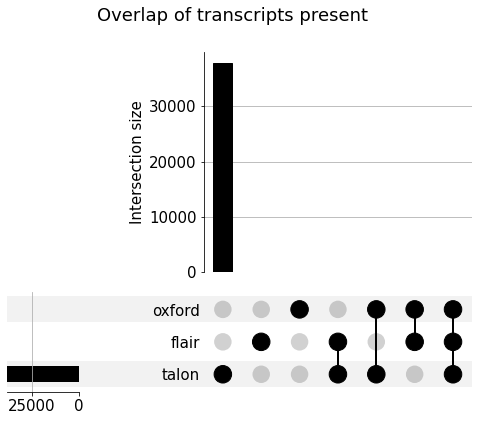

In [111]:
transcripts = from_contents({'oxford': set(ox_values), 'flair': set(flair_values), 'talon': set(talon_values)})
upset_plot(transcripts, element_size=50)
plt.suptitle('Overlap of transcripts present')
plt.savefig(snakemake.output.all_upset, dpi=200)

Create a venndiagram that shows overlap of transcripts that are  present in the samples

Text(0.5, 1.0, 'Overlap of transcripts present')

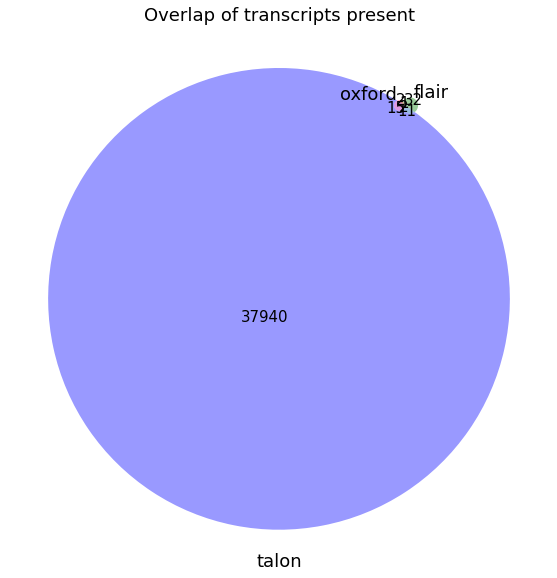

In [104]:
venn3([set(ox_values), set(flair_values), set(talon_values)], ('oxford', 'flair', 'talon'))
plt.title('Overlap of transcripts present')
plt.savefig(snakemake.output.all_diagram, dpi=200)

Extract transfrag's with a count higher then zero and have a '=' class code.

In [105]:
ox_mask_known = (df['oxford.counts'] > 0) & (df['Class code'] == '=')
ox_array_known = df[ox_mask_known].values
ox_values_known = ox_array_known.T[0]

flair_mask_known = (df['flair.counts'] > 0) & (df['Class code'] == '=')
flair_array_known = df[flair_mask_known].values
flair_values_known = flair_array_known.T[0]

talon_mask_known = (df['talon.counts'] > 0) & (df['Class code'] == '=')
talon_array_known = df[talon_mask_known].values
talon_values_known = talon_array_known.T[0]

Create a upset plot with present transcripts that have being classified as known by GFFcompare.

Text(0.5, 0.98, 'Overlap of transcripts with classcode: "="')

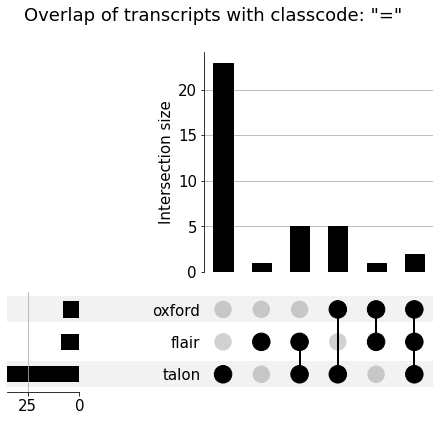

In [106]:
transcripts = from_contents({'oxford': set(ox_values_known), 'flair': set(flair_values_known), 'talon': set(talon_values_known)})
upset_plot(transcripts, element_size=50)
plt.suptitle('Overlap of transcripts with classcode: "="')
plt.savefig(snakemake.output.known_upset, dpi=200)

Create a venndiagram with present transcripts that have being classified as known by GFFcompare.

Text(0.5, 1.0, 'Overlap of transcripts with classcode: "="')

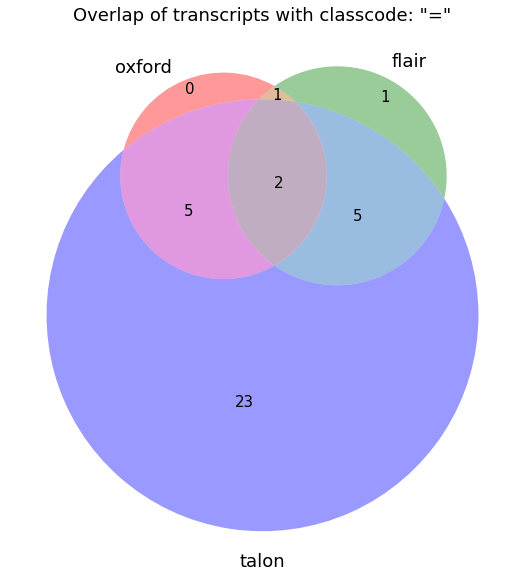

In [107]:
venn3([set(ox_values_known), set(flair_values_known), set(talon_values_known)], ('oxford', 'flair', 'talon'))
plt.title('Overlap of transcripts with classcode: "="')
plt.savefig(snakemake.output.known_diagram, dpi=200)

Extract transfrag's with a count higher then zero and do not have a '=' class code.

In [108]:
ox_mask_novel = (df['oxford.counts'] > 1) & (df['Class code'] != '=')
ox_array_novel = df[ox_mask_novel].values
ox_values_novel = ox_array_novel.T[0]

flair_mask_novel = (df['flair.counts'] > 1) & (df['Class code'] != '=')
flair_array_novel = df[flair_mask_novel].values
flair_values_novel = flair_array_novel.T[0]

talon_mask_novel = (df['talon.counts'] > 1) & (df['Class code'] != '=')
talon_array_novel = df[talon_mask_novel].values
talon_values_novel = talon_array_novel.T[0]

Create a venndiagram with present transcripts that have being classified as novel by GFFcompare

Text(0.5, 0.98, 'Overlap of transcripts that do NOT have classcode: "="')

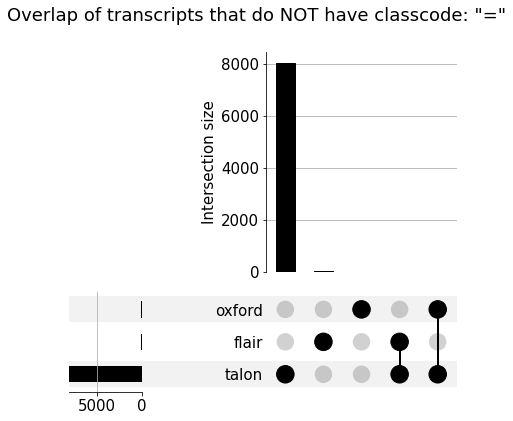

In [109]:
transcripts = from_contents({'oxford': set(ox_values_novel), 'flair': set(flair_values_novel), 'talon': set(talon_values_novel)})
upset_plot(transcripts, element_size=50)
plt.suptitle('Overlap of transcripts that do NOT have classcode: "="')
plt.savefig(snakemake.output.novel_upset, dpi=200)

Create a venndiagram with present transcripts that have being classified as novel by GFFcompare

Text(0.5, 1.0, 'Overlap of transcripts that do NOT have classcode: "="')

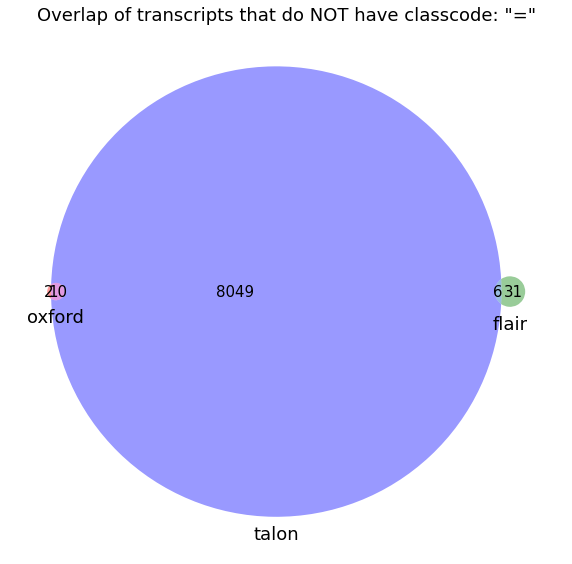

In [110]:
venn3([set(ox_values_novel), set(flair_values_novel), set(talon_values_novel)], ('oxford', 'flair', 'talon'))
plt.title('Overlap of transcripts that do NOT have classcode: "="')
plt.savefig(snakemake.output.novel_diagram, dpi=200)